In [1]:
!pip install git+https://github.com/taobrienlbl/simple_dynamical_models.git

  Cloning https://github.com/taobrienlbl/simple_dynamical_models.git to c:\users\travi\appdata\local\temp\pip-req-build-1e22w16q
  Resolved https://github.com/taobrienlbl/simple_dynamical_models.git to commit 098db58b1295883d7ce4f25c9b9ef5db92e26926
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for simple-dynamical-models: filename=simple_dynamical_models-0.0.1-py3-none-any.whl size=18027 sha256=ea86aa53b13558484422173b563d93257323c88144dfc3db52dfcb11566783e5
  Stored in directory: C:\Users\travi\AppData\Local\Temp\pip-ephem-wheel-cache-fk0utrij\wheels\d9\8c\7a\c80b96a626cd7f33fb79a2ab6d

  Running command git clone --filter=blob:none --quiet https://github.com/taobrienlbl/simple_dynamical_models.git 'C:\Users\travi\AppData\Local\Temp\pip-req-build-1e22w16q'
You should consider upgrading via the 'C:\Users\travi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

import sys

%load_ext autoreload
%autoreload 2
sys.path.insert(0, r"C:\\Users\\travi\\projects\\simple_dynamical_models\\src")

from simplemodels.shallowwater1d import *

mpl.style.use('seaborn-poster')

C:\Users\travi\AppData\Local\Temp\ipykernel_12596\2089975983.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn-poster')


In [3]:
""" Set up the non-rotating shallow water model """

# set the resolution
nx = ny = 201
dx = dy = 50e3 # [m]

# set the run time # [d]
steptime = 1/24/12 # [d] (5 mins)

# set the coriolis parameter
f = 0 # [1/s]

# set the amplitude and height of the initial height perturbation [m]
s_b = 3 # [gridcells]
a_b = 100 # [m]

# set the center of the initial height perturbation
cx = (nx-1)/2
cy = (ny-1)/2
x = np.arange(nx)
y = np.arange(ny)
x, y = np.meshgrid(x,y)

# set the base height
h0 = 1e4 # [m]

# set the initial state
# index 0: u, index 1: v, index 2: h
state0 = np.zeros((3, nx, ny))
state0[2,...] = h0 + a_b * np.exp(-((x - cx)**2 + (y - cy)**2)/(4*(s_b**2)))


# instantiate the model 
nonrotating_narrow_perturbation_model = SW1DSolver(
    nx = nx, ny = ny, dx = dx, dy = dy,
    f=f,
    state0 = state0)

# initialize the xarray output
nonrotating_narrow_perturbation_model_xr = None

# run the model an arbitrary number of steps
for i in range(30):
    nonrotating_narrow_perturbation_model.step_forward(ndays = steptime)

    if nonrotating_narrow_perturbation_model_xr is None:
        nonrotating_narrow_perturbation_model_xr = nonrotating_narrow_perturbation_model.get_state_xarray().copy(deep = True)
    else:
        nonrotating_narrow_perturbation_model_xr = xr.concat([nonrotating_narrow_perturbation_model_xr, nonrotating_narrow_perturbation_model.get_state_xarray().copy(deep = True)], dim = 'time')

MovieWriter imagemagick unavailable; using Pillow instead.


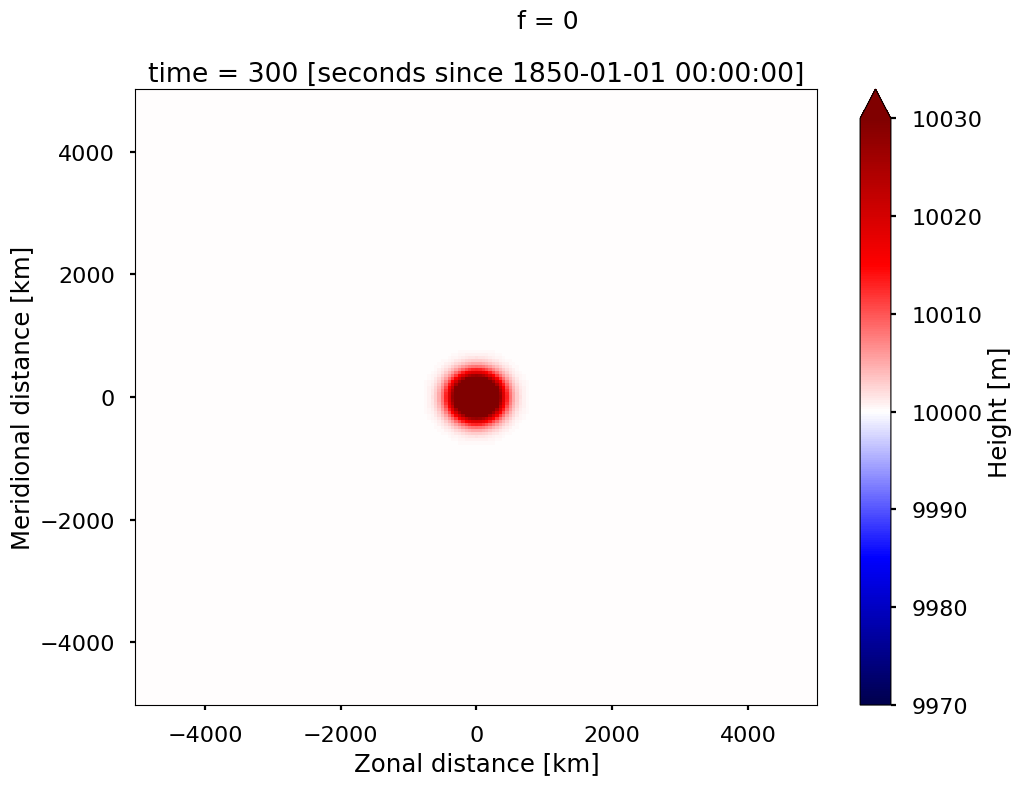

In [4]:
""" Show the last run as an animation. """
levels = range(90)
fig, ax = plt.subplots(figsize=[11,8])#ncols=1) #Creating the basis for the plot

def animate(time):
    mld= nonrotating_narrow_perturbation_model_xr['H'].isel(time=time).plot(vmin = h0 - 30, vmax = h0 + 30, cmap = 'seismic', ax = ax, add_colorbar = False)

ani = animation.FuncAnimation(fig, animate, len(nonrotating_narrow_perturbation_model_xr.time), interval=400, blit=False)


nonrotating_narrow_perturbation_model_xr['H'].isel(time=0).plot(vmin = h0 - 30, vmax = h0 + 30, cmap = 'seismic', ax = ax)

ax.set_title("")

fig.suptitle("f = 0", fontsize= 18)

ani.save('non_rotating_narrow_perturbation.gif', writer='imagemagick', fps = 2) #Save animation as gif-file

HTML(ani.to_jshtml()) #Show the animation in the kernel

In [5]:
""" Set up the rotating shallow water model """

# set the resolution
nx = ny = 201
dx = dy = 50e3 # [m]

# set the run time # [d]
steptime = 1/24/12 # [d] (5 mins)

# set the coriolis parameter
f = 1e-4 # [1/s]

# set the amplitude and height of the initial height perturbation [m]
s_b = 3 # [gridcells]
a_b = 100 # [m]

# set the center of the initial height perturbation
cx = (nx-1)/2
cy = (ny-1)/2
x = np.arange(nx)
y = np.arange(ny)
x, y = np.meshgrid(x,y)

# set the base height
h0 = 1e4 # [m]

# set the initial state
# index 0: u, index 1: v, index 2: h
state0 = np.zeros((3, nx, ny))
state0[2,...] = h0 + a_b * np.exp(-((x - cx)**2 + (y - cy)**2)/(4*(s_b**2)))


# instantiate the model 
rotating_narrow_perturbation_model = SW1DSolver(
    nx = nx, ny = ny, dx = dx, dy = dy,
    f=f,
    state0 = state0)

# initialize the xarray output
rotating_narrow_perturbation_model_xr = None

# run the model an arbitrary number of steps
for i in range(30):
    rotating_narrow_perturbation_model.step_forward(ndays = steptime)

    if rotating_narrow_perturbation_model_xr is None:
        rotating_narrow_perturbation_model_xr = rotating_narrow_perturbation_model.get_state_xarray().copy(deep = True)
    else:
        rotating_narrow_perturbation_model_xr = xr.concat([rotating_narrow_perturbation_model_xr, rotating_narrow_perturbation_model.get_state_xarray().copy(deep = True)], dim = 'time')

MovieWriter imagemagick unavailable; using Pillow instead.


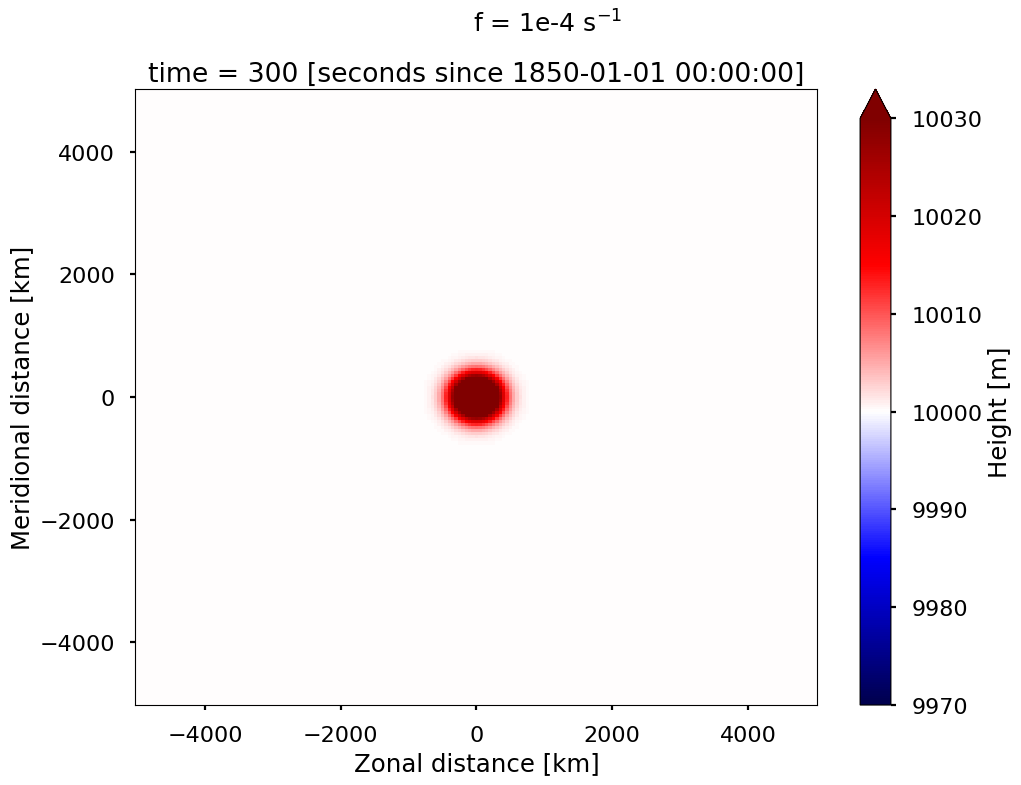

In [6]:
""" Show the last run as an animation. """
levels = range(90)
fig, ax = plt.subplots(figsize=[11,8])#ncols=1) #Creating the basis for the plot

def animate(time):
    mld= rotating_narrow_perturbation_model_xr['H'].isel(time=time).plot(vmin = h0 - 30, vmax = h0 + 30, cmap = 'seismic', ax = ax, add_colorbar = False)

ani = animation.FuncAnimation(fig, animate, len(rotating_narrow_perturbation_model_xr.time), interval=400, blit=False)


rotating_narrow_perturbation_model_xr['H'].isel(time=0).plot(vmin = h0 - 30, vmax = h0 + 30, cmap = 'seismic', ax = ax)

ax.set_title("")

fig.suptitle("f = 1e-4 s$^{-1}$", fontsize= 18)

ani.save('rotating_narrow_perturbation.gif', writer='imagemagick', fps = 2) #Save animation as gif-file

HTML(ani.to_jshtml()) #Show the animation in the kernel

In [7]:
""" Set up the rotating shallow water model """

# set the resolution
nx = ny = 201
dx = dy = 50e3 # [m]

# set the run time # [d]
steptime = 1/24/12 # [d] (5 mins)

# set the coriolis parameter
f = 1e-3 # [1/s]

# set the amplitude and height of the initial height perturbation [m]
s_b = 10 # [gridcells]
a_b = 100 # [m]

# set the center of the initial height perturbation
cx = (nx-1)/2
cy = (ny-1)/2
x = np.arange(nx)
y = np.arange(ny)
x, y = np.meshgrid(x,y)

# set the base height
h0 = 1e4 # [m]

# set the initial state
# index 0: u, index 1: v, index 2: h
state0 = np.zeros((3, nx, ny))
state0[2,...] = h0 + a_b * np.exp(-((x - cx)**2 + (y - cy)**2)/(4*(s_b**2)))


# instantiate the model 
rotating_wide_perturbation_model = SW1DSolver(
    nx = nx, ny = ny, dx = dx, dy = dy,
    f=f,
    state0 = state0)

# initialize the xarray output
rotating_wide_perturbation_model_xr = None

# run the model an arbitrary number of steps
for i in range(30):
    rotating_wide_perturbation_model.step_forward(ndays = steptime)

    if rotating_wide_perturbation_model_xr is None:
        rotating_wide_perturbation_model_xr = rotating_wide_perturbation_model.get_state_xarray().copy(deep = True)
    else:
        rotating_wide_perturbation_model_xr = xr.concat([rotating_wide_perturbation_model_xr, rotating_wide_perturbation_model.get_state_xarray().copy(deep = True)], dim = 'time')

MovieWriter imagemagick unavailable; using Pillow instead.


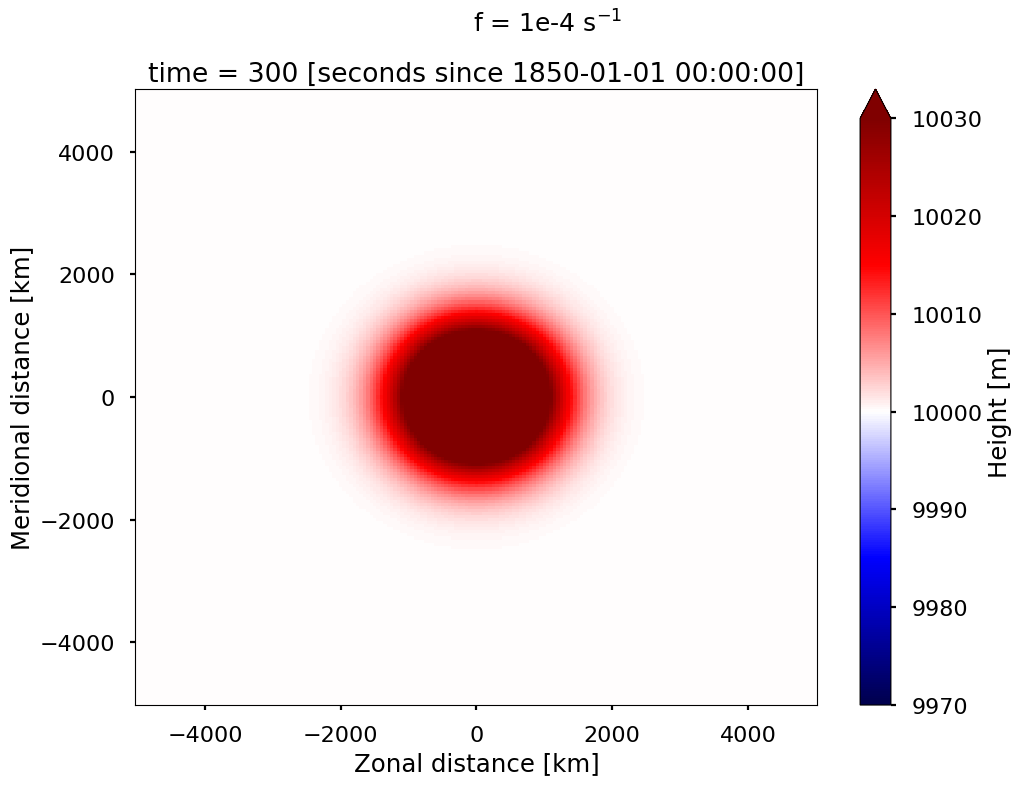

In [8]:
""" Show the last run as an animation. """
levels = range(90)
fig, ax = plt.subplots(figsize=[11,8])#ncols=1) #Creating the basis for the plot

def animate(time):
    mld= rotating_wide_perturbation_model_xr['H'].isel(time=time).plot(vmin = h0 - 30, vmax = h0 + 30, cmap = 'seismic', ax = ax, add_colorbar = False)

ani = animation.FuncAnimation(fig, animate, len(rotating_wide_perturbation_model_xr.time), interval=400, blit=False)


rotating_wide_perturbation_model_xr['H'].isel(time=0).plot(vmin = h0 - 30, vmax = h0 + 30, cmap = 'seismic', ax = ax)

ax.set_title("")

fig.suptitle("f = 1e-4 s$^{-1}$", fontsize= 18)

ani.save('rotating_wide_perturbation.gif', writer='imagemagick', fps = 2) #Save animation as gif-file

HTML(ani.to_jshtml()) #Show the animation in the kernel